# CASE STUDY - LOAN PAID / UNPAID

### STEP 1 - PROBLEM STATEMENT

This dataset is about past loans. The `loan_train.csv` data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount                                                           |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

### STEP 2 - IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

### STEP 3 - IMPORTING DATASET  & DATA EXPLORATION

In [2]:
# Importing the datset 

df = pd.read_csv('loan_train.csv')
print("Data Imported Successfully")

Data Imported Successfully


In [3]:
# Checking top 5 records

df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
# Dropping unwanted columns

df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'],
        axis    = 1,
        inplace = True)

df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
# Renaming Columns

df.rename(columns = {
     'loan_status'    : 'Loan_Status',
     'Principal'      : 'Principal',
     'terms'          : 'Terms',
     'effective_date' : 'Effective_Date',
     'due_date'       : 'Due_Date',
     'age'            : 'Age',
     'education'      : 'Education',
     'Gender'         : 'Gender'
}, inplace = True)

df.head()

,Loan_Status,Principal,Terms,Effective_Date,Due_Date,Age,Education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [6]:
# Rearraning target column position

cols = df.columns.tolist()
cols

['Loan_Status',
 'Principal',
 'Terms',
 'Effective_Date',
 'Due_Date',
 'Age',
 'Education',
 'Gender']

In [7]:
cols = ['Principal','Terms','Effective_Date','Due_Date','Age','Education','Gender','Loan_Status']

df = df[cols]
df.head()

,Principal,Terms,Effective_Date,Due_Date,Age,Education,Gender,Loan_Status
0,1000,30,9/8/2016,10/7/2016,45,High School or Below,male,PAIDOFF
1,1000,30,9/8/2016,10/7/2016,33,Bechalor,female,PAIDOFF
2,1000,15,9/8/2016,9/22/2016,27,college,male,PAIDOFF
3,1000,30,9/9/2016,10/8/2016,28,college,female,PAIDOFF
4,1000,30,9/9/2016,10/8/2016,29,college,male,PAIDOFF


In [8]:
# Replacing values under Education and Gender column

df['Education'].replace({
    'High School or Below' : 'High School & Below',
    'Bechalor'             : 'Bachelor',
    'college'              : 'College',
    'Master or Above'      : 'Masters & Above'
}, inplace = True)


df['Gender'].replace({
    'male'   : 'Male',
    'female' : 'Female'
}, inplace = True)

df.head()

,Principal,Terms,Effective_Date,Due_Date,Age,Education,Gender,Loan_Status
0,1000,30,9/8/2016,10/7/2016,45,High School & Below,Male,PAIDOFF
1,1000,30,9/8/2016,10/7/2016,33,Bachelor,Female,PAIDOFF
2,1000,15,9/8/2016,9/22/2016,27,College,Male,PAIDOFF
3,1000,30,9/9/2016,10/8/2016,28,College,Female,PAIDOFF
4,1000,30,9/9/2016,10/8/2016,29,College,Male,PAIDOFF


In [9]:
# Checking unique values in dataset

print("Unique values of Education Level : ", df['Education'].unique())

print("Unique values of Loan Status     : ", df['Loan_Status'].unique())

Unique values of Education Level :  ['High School & Below' 'Bachelor' 'College' 'Masters & Above']
Unique values of Loan Status     :  ['PAIDOFF' 'COLLECTION']


### STEP 4 - DATA VISUALIZATION & FEATURE SELECTION

#####  Data Visualization

> `Loan_Status`

Number of instances recorded :
PAIDOFF       260
COLLECTION     86
Name: Loan_Status, dtype: int64


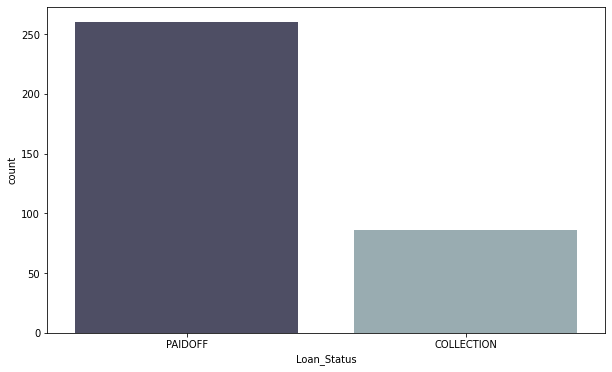

In [10]:
print("Number of instances recorded :")
print(df['Loan_Status'].value_counts())

plt.figure(figsize=(10,6))
sns.countplot(x = 'Loan_Status', 
              data = df,
              palette = 'bone')

plt.show()

> > > `Loan_Status VS Gender`

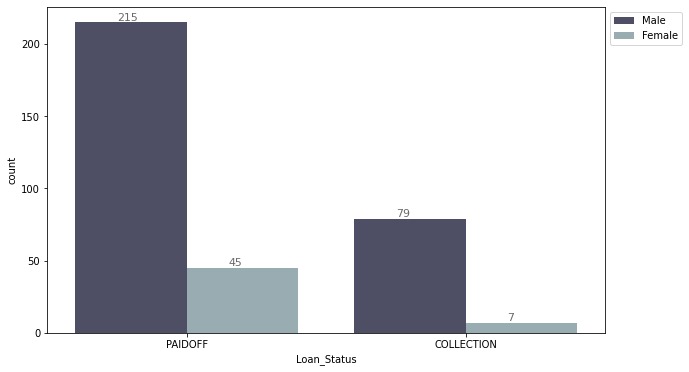

In [11]:
plt.figure(figsize=(10,6))

ax = sns.countplot(x = 'Loan_Status', 
                   data = df,
                   palette = 'bone',
                   hue = 'Gender')

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()+1.5, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')
        
plt.legend(loc='upper left', 
           bbox_to_anchor = (1,1))

plt.show()

In [12]:
print("\t\tLoan_Status - Males \n")
df_Male = df.Loan_Status[(df.Gender == 'Male') & ((df.Loan_Status == 'PAIDOFF') | (df.Loan_Status == 'COLLECTION'))]
print(df_Male.value_counts())

print("\n")

print("\t\tLoan_Status - Females \n")
df_Female = df.Loan_Status[(df.Gender == 'Female') & ((df.Loan_Status == 'PAIDOFF') | (df.Loan_Status == 'COLLECTION'))]
print(df_Female.value_counts())

		Loan_Status - Males 

PAIDOFF       215
COLLECTION     79
Name: Loan_Status, dtype: int64


		Loan_Status - Females 

PAIDOFF       45
COLLECTION     7
Name: Loan_Status, dtype: int64


> > > `Loan_Status VS Education`

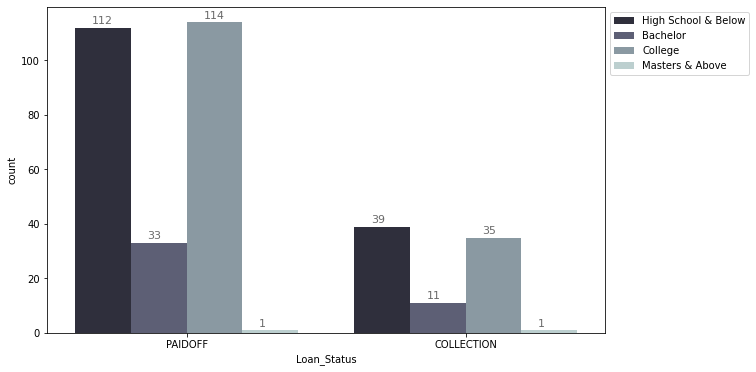

In [13]:
plt.figure(figsize=(10,6))

ax = sns.countplot(x = 'Loan_Status', 
                   data = df,
                   palette = 'bone',
                   hue = 'Education')

for i in ax.patches:
    ax.text(i.get_x()+.06, i.get_height()+1.5, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')
        
plt.legend(loc='upper left', 
           bbox_to_anchor = (1,1))

plt.show()

In [14]:
df_EDU= df.Loan_Status[((df.Education == 'High School & Below') | 
                              (df.Education == 'Bachelor') | 
                              (df.Education == 'College') | 
                              (df.Education == 'Masters & Above')) & ((df.Loan_Status == 'PAIDOFF')| (df.Loan_Status == 'COLLECTION'))]

print("\t\tEducation - PAIDOFF & COLLECTION\n")
print(df_EDU.value_counts())

		Education - PAIDOFF & COLLECTION

PAIDOFF       260
COLLECTION     86
Name: Loan_Status, dtype: int64


> `AGE`

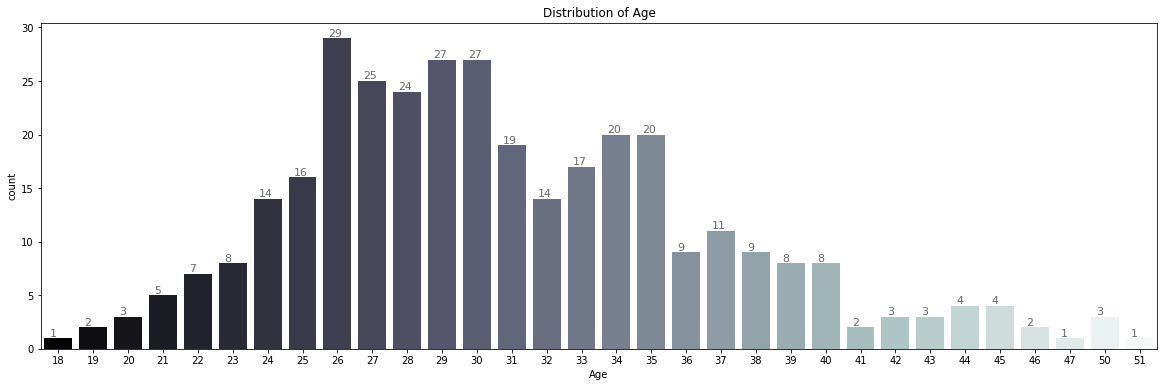

In [15]:
plt.figure (figsize = (20,6))

ax = sns.countplot(df['Age'], 
                   palette = 'bone')

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()+.2, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')
    
    
plt.title('Distribution of Age')
plt.show()

> > > `Age Group - Distribution`

Nos of customers based on Age-Group 

Nos of customers between 15-30 : 188
Nos of customers between 31-45 : 151
Nos of customers between 45 >  : 7


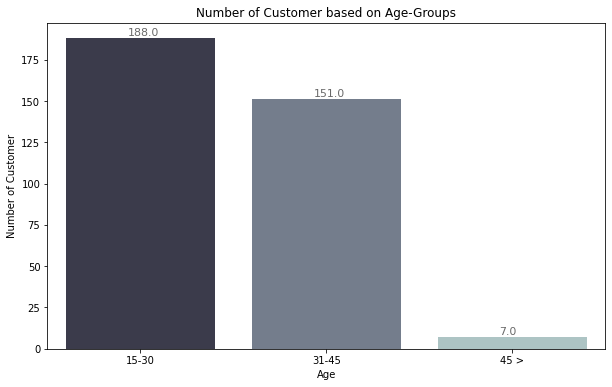

In [16]:
age15_30    = df.Age[(df.Age <= 30) & (df.Age >= 15)]
age31_45    = df.Age[(df.Age <= 45) & (df.Age >= 31)]
age46_above = df.Age[(df.Age >= 46)]

print('Nos of customers based on Age-Group \n')
print('Nos of customers between 15-30 :', age15_30.value_counts().sum())
print('Nos of customers between 31-45 :', age31_45.value_counts().sum())
print('Nos of customers between 45 >  :', age46_above.value_counts().sum())

X = ["15-30", "31-45", "45 >"]
y = [len(age15_30.values), len(age31_45.values), len(age46_above.values)]

plt.figure(figsize=(10,6))

ax = sns.barplot(x=X, 
            y=y, 
            palette='bone')

for i in ax.patches:
    ax.text(i.get_x()+.33, i.get_height()+1.7, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')

plt.title("Number of Customer based on Age-Groups")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

> > > `Loan_Status VS Age`

In [17]:
age_15_30    = df[(df.Age <= 30) & (df.Age >= 15)]
age_31_45    = df[(df.Age <= 45) & (df.Age >= 31)]
age_46_above = df[(df.Age >= 46)]

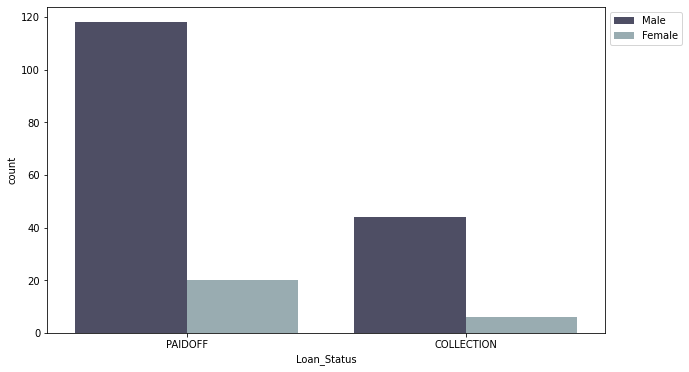

In [117]:
plt.figure(figsize = (10,6))

ax = sns.countplot(x = 'Loan_Status', 
              data = age_15_30,
              palette='bone',
              hue = 'Gender')


    
plt.legend(loc='upper left', 
           bbox_to_anchor = (1,1))

plt.show()

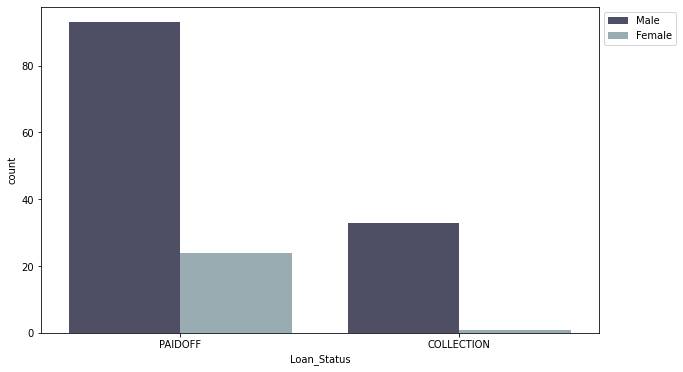

In [19]:
plt.figure(figsize = (10,6))

sns.countplot(x = 'Loan_Status', 
              data = age_31_45,
              palette='bone',
              hue = 'Gender')

plt.legend(loc='upper left', 
           bbox_to_anchor = (1,1))

plt.show()

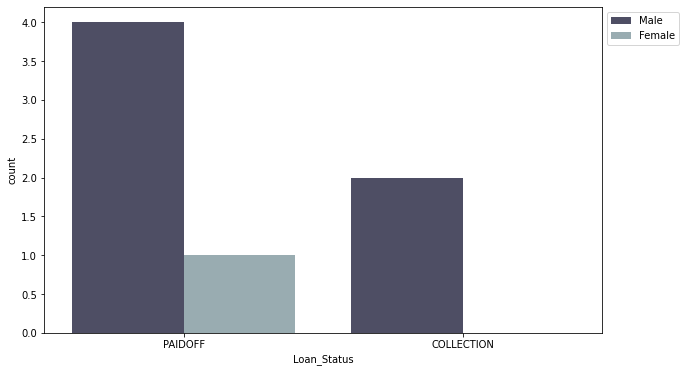

In [20]:
plt.figure(figsize = (10,6))

sns.countplot(x = 'Loan_Status', 
              data = age_46_above,
              palette='bone',
              hue = 'Gender')

plt.legend(loc='upper left', 
           bbox_to_anchor = (1,1))

plt.show()

> `Pie Chart - Distribution`

> > > `Gender`

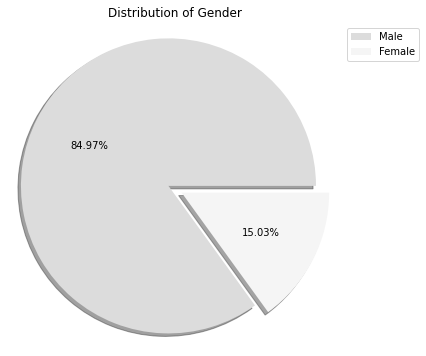

In [21]:
labels  = ['Male', 'Female']
size    = df['Gender'].value_counts()
colors  = ['gainsboro', 'whitesmoke']
explode = [0, 0.1]

plt.figure(figsize=(6,6))
plt.pie(size,
        explode,
        shadow  = True,
        autopct = '%.2f%%',
        colors  = colors)
plt.axis('equal')
plt.title('Distribution of Gender')
plt.legend(labels, loc='upper left', bbox_to_anchor = (1,1))

plt.show()

##### Feature Selection

In [22]:
df.head()

,Principal,Terms,Effective_Date,Due_Date,Age,Education,Gender,Loan_Status
0,1000,30,9/8/2016,10/7/2016,45,High School & Below,Male,PAIDOFF
1,1000,30,9/8/2016,10/7/2016,33,Bachelor,Female,PAIDOFF
2,1000,15,9/8/2016,9/22/2016,27,College,Male,PAIDOFF
3,1000,30,9/9/2016,10/8/2016,28,College,Female,PAIDOFF
4,1000,30,9/9/2016,10/8/2016,29,College,Male,PAIDOFF


In [23]:
df_copy = df
df_copy.head()

,Principal,Terms,Effective_Date,Due_Date,Age,Education,Gender,Loan_Status
0,1000,30,9/8/2016,10/7/2016,45,High School & Below,Male,PAIDOFF
1,1000,30,9/8/2016,10/7/2016,33,Bachelor,Female,PAIDOFF
2,1000,15,9/8/2016,9/22/2016,27,College,Male,PAIDOFF
3,1000,30,9/9/2016,10/8/2016,28,College,Female,PAIDOFF
4,1000,30,9/9/2016,10/8/2016,29,College,Male,PAIDOFF


In [24]:
# Dropping Effective_Date and Due_Date columns

df.drop(columns = ['Effective_Date','Due_Date'],
        inplace = True)

In [25]:
# Handling Categorical Values

df = pd.get_dummies(df)
df.head()

,Principal,Terms,Age,Education_Bachelor,Education_College,Education_High School & Below,Education_Masters & Above,Gender_Female,Gender_Male,Loan_Status_COLLECTION,Loan_Status_PAIDOFF
0,1000,30,45,0,0,1,0,0,1,0,1
1,1000,30,33,1,0,0,0,1,0,0,1
2,1000,15,27,0,1,0,0,0,1,0,1
3,1000,30,28,0,1,0,0,1,0,0,1
4,1000,30,29,0,1,0,0,0,1,0,1


In [26]:
# Dropping redundant columns

df.drop(columns = ['Education_Masters & Above', 'Gender_Female', 'Loan_Status_COLLECTION'],
        inplace = True)

df.head()

,Principal,Terms,Age,Education_Bachelor,Education_College,Education_High School & Below,Gender_Male,Loan_Status_PAIDOFF
0,1000,30,45,0,0,1,1,1
1,1000,30,33,1,0,0,0,1
2,1000,15,27,0,1,0,1,1
3,1000,30,28,0,1,0,0,1
4,1000,30,29,0,1,0,1,1


In [27]:
# Renaming columns

df.rename(columns = {
    'Education_Bachelor'            : 'Edu_Bachelor',
    'Education_College'             : 'Edu_College',
    'Education_High School & Below' : 'Edu_High_School',
    'Gender_Male'                   : 'Gender',
    'Loan_Status_PAIDOFF'           : 'Loan_Status'
}, inplace = True)

df.head()

,Principal,Terms,Age,Edu_Bachelor,Edu_College,Edu_High_School,Gender,Loan_Status
0,1000,30,45,0,0,1,1,1
1,1000,30,33,1,0,0,0,1
2,1000,15,27,0,1,0,1,1
3,1000,30,28,0,1,0,0,1
4,1000,30,29,0,1,0,1,1


- Gender
   > 1 - Male 
   
   > 0 - Female
   
   
- Loan_Status
   > 1 - Paidoff
   
   > 0 - Collection

(8.5, -0.5)

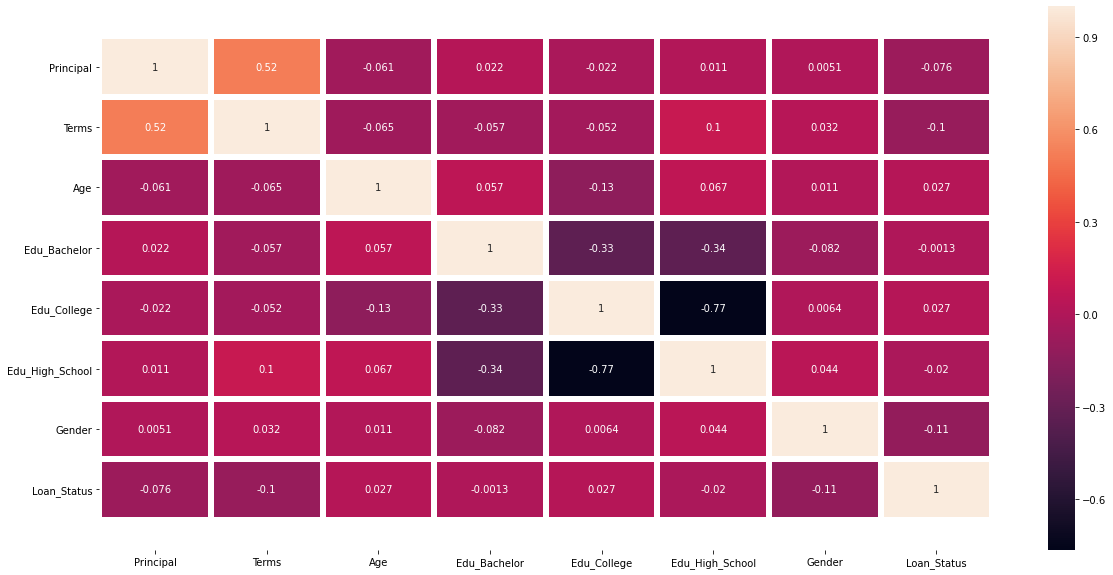

In [28]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(data=df.corr(), linewidths=5, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

From above heatmap we see that there is no colinearity observed between the columns of the dataset. So for now all features can be considered for training the model.

### STEP 5 - MODEL TRAINING & EVALUATION

In [29]:
df.head()

,Principal,Terms,Age,Edu_Bachelor,Edu_College,Edu_High_School,Gender,Loan_Status
0,1000,30,45,0,0,1,1,1
1,1000,30,33,1,0,0,0,1
2,1000,15,27,0,1,0,1,1
3,1000,30,28,0,1,0,0,1
4,1000,30,29,0,1,0,1,1


##### Splitting Data - Independent & Dependent Variables

In [30]:
X = df.iloc[:, 0:7].values
y = df.iloc[:, 7:8].values

print("Data Seperated Successfully")

Data Seperated Successfully


##### Splitting Data - Training & Test Set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print("Data Seperated Successfully")

Data Seperated Successfully


##### Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

##### Building Model

> > > K - Nearest Neighbour

In [33]:
#Building Model
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors = 3)
model_KNN.fit(X_train, y_train)

#Predictions
y_pred1 = model_KNN.predict(X_test)

#Accuracy
from sklearn import metrics
print("Train Set Accuracy :", metrics.accuracy_score(y_train, model_KNN.predict(X_train)))
print("Tests Set Accuracy :", metrics.accuracy_score(y_test, y_pred1))

pd.crosstab(y_test.flatten(), y_pred1, rownames=['Actual Class'], colnames = ['Predicted Class'])

Train Set Accuracy : 0.7753623188405797
Tests Set Accuracy : 0.7428571428571429


Predicted Class,0,1
Actual Class,,
0,1,11
1,7,51


In [34]:
#Calculating accuaracy for different values of K's

Ks = 10
mean_acc = np.zeros(Ks-1)
for n in range(1,Ks):
    
    #Train Model and Predict  
    model_KNN = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    y_pred1=model_KNN.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred1)
    print('Accuracy at k =', n, 'is', mean_acc[n-1])

Accuracy at k = 1 is 0.6857142857142857
Accuracy at k = 2 is 0.6142857142857143
Accuracy at k = 3 is 0.7428571428571429
Accuracy at k = 4 is 0.6285714285714286
Accuracy at k = 5 is 0.8428571428571429
Accuracy at k = 6 is 0.7714285714285715
Accuracy at k = 7 is 0.8428571428571429
Accuracy at k = 8 is 0.7857142857142857
Accuracy at k = 9 is 0.8285714285714286


In [47]:
# Giving K = 5 & 7 yields same accuracy so we are re-building the model and getting confusion matrix

from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors = 5)
model_KNN.fit(X_train, y_train)

#Predictions
y_pred1 = model_KNN.predict(X_test)

#Accuracy
from sklearn import metrics
print("Train Set Accuracy :", metrics.accuracy_score(y_train, model_KNN.predict(X_train)) * 100)
print("Tests Set Accuracy :", metrics.accuracy_score(y_test, y_pred1) * 100 )
print("\n")

print(pd.crosstab(y_test.flatten(), y_pred1, rownames=['Actual Class'], colnames = ['Predicted Class']))

Train Set Accuracy : 74.63768115942028
Tests Set Accuracy : 84.28571428571429


Predicted Class  0   1
Actual Class          
0                4   8
1                3  55


> > > Decision Tree

In [45]:
#Building Model
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model_DT.fit(X_train, y_train)

#Prediction
y_pred2 = model_DT.predict(X_test)

#Accuracy
from sklearn import metrics
print("Train Set Accuracy :", metrics.accuracy_score(y_train, model_DT.predict(X_train)) * 100)
print("Tests Set Accuracy :", metrics.accuracy_score(y_test, y_pred2) * 100)
print("\n")

print(pd.crosstab(y_test.flatten(), y_pred2, rownames=['Actual Class'], colnames = ['Predicted Class']))

Train Set Accuracy : 73.55072463768117
Tests Set Accuracy : 82.85714285714286


Predicted Class   1
Actual Class       
0                12
1                58


> > > Support Vector Machine

In [44]:
# Building Model
from sklearn import svm
model_SVM = svm.SVC(kernel='rbf')
model_SVM.fit(X_train, y_train)

#Prediction
y_pred3 = model_SVM.predict(X_test)

#Accuracy 
from sklearn import metrics
print("Train Set Accuracy :", metrics.accuracy_score(y_train, model_SVM.predict(X_train)) * 100)
print("Tests Set Accuracy :", metrics.accuracy_score(y_test, y_pred3) * 100)
print("\n")

print(pd.crosstab(y_test.flatten(), y_pred3, rownames=['Actual Class'], colnames = ['Predicted Class']))

Train Set Accuracy : 73.18840579710145
Tests Set Accuracy : 82.85714285714286


Predicted Class   1
Actual Class       
0                12
1                58


> > > Logistic Regression


In [48]:
#Building Model
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(C = 0.1, solver = 'liblinear', random_state=0)
model_LR.fit(X_train, y_train)

#Prediction
y_pred4 = model_LR.predict(X_test)

#Accuracy
from sklearn import metrics
print("Train Set Accuracy :", metrics.accuracy_score(y_train, model_LR.predict(X_train)) * 100)
print("Tests Set Accuracy :", metrics.accuracy_score(y_test, y_pred4) * 100)
print("\n")

print(pd.crosstab(y_test.flatten(), y_pred4, rownames=['Actual Species'], colnames = ['Predicted Species']))

Train Set Accuracy : 73.18840579710145
Tests Set Accuracy : 82.85714285714286


Predicted Species   1
Actual Species       
0                  12
1                  58


### STEP 6  - MODEL TESTING 

In [75]:
test_data = pd.read_csv('loan_test.csv')
print("Data Imported Successfully")

Data Imported Successfully


In [77]:
test_data.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)
test_data.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [78]:
test_data.tail()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
49,COLLECTION,1000,30,9/11/2016,10/10/2016,32,High School or Below,male
50,COLLECTION,800,15,9/11/2016,9/25/2016,29,college,male
51,COLLECTION,1000,30,9/11/2016,10/10/2016,37,High School or Below,male
52,COLLECTION,800,15,9/11/2016,9/25/2016,36,High School or Below,male
53,COLLECTION,1000,30,9/12/2016,10/11/2016,33,High School or Below,male


In [82]:
# Making test data as train data 
test_data.rename(columns = {
     'loan_status'    : 'Loan_Status',
     'Principal'      : 'Principal',
     'terms'          : 'Terms',
     'effective_date' : 'Effective_Date',
     'due_date'       : 'Due_Date',
     'age'            : 'Age',
     'education'      : 'Education',
     'Gender'         : 'Gender'
}, inplace = True)


# Rearranging coloumns
cols = test_data.columns.tolist()
cols = ['Principal','Terms','Effective_Date','Due_Date','Age','Education','Gender','Loan_Status']
test_data = test_data[cols]


# Replacing values under Education and Gender column
test_data['Education'].replace({
    'High School or Below' : 'High School & Below',
    'Bechalor'             : 'Bachelor',
    'college'              : 'College',
    'Master or Above'      : 'Masters & Above'
}, inplace = True)


test_data['Gender'].replace({
    'male'   : 'Male',
    'female' : 'Female'
}, inplace = True)


# Dropping Effective_Date and Due_Date columns
test_data.drop(columns = ['Effective_Date','Due_Date'], inplace = True)


# Handling Categorical Values
test_data = pd.get_dummies(test_data)


# Dropping redundant columns
test_data.drop(columns = ['Education_Masters & Above', 'Gender_Female', 'Loan_Status_COLLECTION'], inplace = True)

# Renaming columns
test_data.rename(columns = {
    'Education_Bachelor'            : 'Edu_Bachelor',
    'Education_College'             : 'Edu_College',
    'Education_High School & Below' : 'Edu_High_School',
    'Gender_Male'                   : 'Gender',
    'Loan_Status_PAIDOFF'           : 'Loan_Status'
}, inplace = True)

print("Data Modified Succeffully")

Data Modified Succeffully


In [83]:
test_data.head()

,Principal,Terms,Age,Edu_Bachelor,Edu_College,Edu_High_School,Gender,Loan_Status
0,1000,30,50,1,0,0,0,1
1,300,7,35,0,0,0,1,1
2,1000,30,43,0,0,1,0,1
3,1000,30,26,0,1,0,1,1
4,800,15,29,1,0,0,1,1


In [84]:
test_data.tail()

,Principal,Terms,Age,Edu_Bachelor,Edu_College,Edu_High_School,Gender,Loan_Status
49,1000,30,32,0,0,1,1,0
50,800,15,29,0,1,0,1,0
51,1000,30,37,0,0,1,1,0
52,800,15,36,0,0,1,1,0
53,1000,30,33,0,0,1,1,0


In [102]:
# TEST 1 - PAIDOFF

test_data.iloc[0:1]

,Principal,Terms,Age,Edu_Bachelor,Edu_College,Edu_High_School,Gender,Loan_Status
0,1000,30,50,1,0,0,0,1


In [101]:
# TEST 2 - COLLECTION 

test_data.iloc[53:54]

,Principal,Terms,Age,Edu_Bachelor,Edu_College,Edu_High_School,Gender,Loan_Status
53,1000,30,33,0,0,1,1,0


In [94]:
# TEST 1

test_1 = [[1000, 30, 50, 1, 0, 0, 0]]

#K-Nearest Neigbour
y_pred1_test1 = model_KNN.predict(test_1)

#Decision Tree
y_pred2_test1 = model_DT.predict(test_1)

#Support Vector Machine
y_pred3_test1 = model_SVM.predict(test_1)

#Logistic Regression
y_pred4_test1 = model_LR.predict(test_1)


print("K-Nearest Neigbour Result     :", y_pred1_test1, "\n")
print("Decision Tree Result          :", y_pred2_test1, "\n")
print("Support Vector Machine Result :", y_pred3_test1, "\n")
print("Logistic Regression Result    :", y_pred4_test1, "\n")

K-Nearest Neigbour Result     : [1] 

Decision Tree Result          : [1] 

Support Vector Machine Result : [1] 

Logistic Regression Result    : [0] 



In [108]:
# TEST 2 

test_2 = [[1000, 30, 33, 0, 0, 1, 1]]

#K-Nearest Neigbour
y_pred1_test2 = model_KNN.predict(test_2)

#Decision Tree
y_pred2_test2 = model_DT.predict(test_2)

#Support Vector Machine
y_pred3_test2 = model_SVM.predict(test_2)

#Logistic Regression
y_pred4_test2 = model_LR.predict(test_2)


print("K-Nearest Neigbour Result     :", y_pred1_test2, "\n")
print("Decision Tree Result          :", y_pred2_test2, "\n")
print("Support Vector Machine Result :", y_pred3_test2, "\n")
print("Logistic Regression Result    :", y_pred4_test2, "\n")

K-Nearest Neigbour Result     : [1] 

Decision Tree Result          : [1] 

Support Vector Machine Result : [1] 

Logistic Regression Result    : [0] 



### STEP 7 - REPORT 

In [62]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

> > > K - Nearest Neigbour

In [68]:
print("\t\tJACCARD DISTANCE:\n")
print(jaccard_similarity_score(y_test, y_pred1) * 100, "\n")

print("\t\tF1 SCORE:\n")
print(f1_score(y_test, y_pred1) * 100, "\n")

		JACCARD DISTANCE:

84.28571428571429 

		F1 SCORE:

90.9090909090909 



> > > Decision Trees

In [69]:
print("\t\tJACCARD DISTANCE:\n")
print(jaccard_similarity_score(y_test, y_pred2) * 100, "\n")

print("\t\tF1 SCORE:\n")
print(f1_score(y_test, y_pred2) * 100, "\n")

		JACCARD DISTANCE:

82.85714285714286 

		F1 SCORE:

90.625 



> > > Support Vector Machine

In [70]:
print("\t\tJACCARD DISTANCE:\n")
print(jaccard_similarity_score(y_test, y_pred3) * 100, "\n")

print("\t\tF1 SCORE:\n")
print(f1_score(y_test, y_pred3) * 100, "\n")

		JACCARD DISTANCE:

82.85714285714286 

		F1 SCORE:

90.625 



> > > Logistic Regression 


In [71]:
print("\t\tJACCARD DISTANCE:\n")
print(jaccard_similarity_score(y_test, y_pred4) * 100, "\n")

print("\t\tF1 SCORE:\n")
print(f1_score(y_test, y_pred4) * 100, "\n")

		JACCARD DISTANCE:

82.85714285714286 

		F1 SCORE:

90.625 



| Algorithm          | Jaccard | F1-score | Accuracy|
|--------------------|---------|----------|---------|
| KNN                | 84.28   | 90.90    | 84.28   |
| Decision Tree      | 82.85   | 90.62    | 82.85   |
| SVM                | 82.85   | 90.62    | 82.85   |
| LogisticRegression | 82.85   | 90.62    | 82.85   |

### STEP 8 - CONCLUSION

- We saw that while providing the test data for `PAIDOFF` KNN, Decision-Tree, SVM could predict it correctly but Logistisctic regression failed to predict it. Logistic Regression misclassified as it as `COLLECTION` 


- Also, when we provided the test data for `COLLECTION` the result's observed where to be opposite of `PAIDOFF`. KNN, Decision Tree, Support Vector Machine  misclassified it wrongly where as Logistic Regression classified it correctly.


- The accuracy of Decision Tree, Support Vector Machine, Logistic Regression was found to be same i.e. 82.85%


- If we compare accuracy wise K-Nearest Neighbour gave better accuracy i.e. 84%


- Coming to performance wise/evaluation on test data all algorithm where not up to the mark. There where misclassification observed. One reason could be the amount of the data was minimal which lead to misclassification. 


- When we compare `Age-Group Distribution` with `Loan_Status` and `Gender` acting as a legend we could see there where more number of Males as compared to Females under both the target. Also more than 50% of various age-group where under `PAIDOFF` category which could also be the cause of missclassification of the test sample.